In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

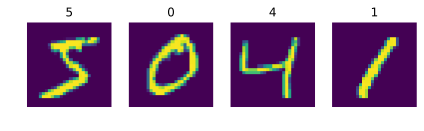

In [4]:
fig, axes = plt.subplots(1,4,figsize=(7,3))
for img, label, ax in zip(x_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [5]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

with tf.Session() as sess:
    y_train = sess.run(tf.one_hot(y_train, 10))
    y_test = sess.run(tf.one_hot(y_test, 10))

In [6]:
learning_rate = 0.01
epochs = 50
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [7]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(0.1*np.random.randn(784,10).astype(np.float32))
B = tf.Variable(0.1*np.random.randn(10).astype(np.float32))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W),B))
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


epoch: 0 cost: 0.3071759
epoch: 1 cost: 0.78020006
epoch: 2 cost: 0.5438507
epoch: 3 cost: 0.44758838
epoch: 4 cost: 0.4651572
epoch: 5 cost: 0.53087705
epoch: 6 cost: 0.4144167
epoch: 7 cost: 0.35221076
epoch: 8 cost: 0.47092324
epoch: 9 cost: 0.2793935
accuracy: 88.84000182151794


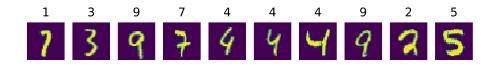

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10):
        for i in range(batches):
            offset = i*epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sess.run(optimizer, feed_dict={X:x, Y:y}) 
            c = sess.run(cost, feed_dict={X:x, Y:y})
        if epoch%1 == 0:
            print('epoch: ' + str(epoch) +' cost: ' + str(c))
    correct = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    acc = accuracy.eval({X:x_test, Y:y_test})
    print('accuracy: ' + str(acc*100))

    fig, axes = plt.subplots(1,10,figsize=(8,4))
    for img, ax in zip(x_test[111:150], axes):
        guess = np.argmax(sess.run(pred,feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape(28,28))
        ax.axis('off')
        
    